In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
import pyslha
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

In [2]:
pts = []
eventsFolder = '../testZprime/Events/'
# eventsFolder = '../DMSimp_vector_all/Events/'
for f in glob.glob(eventsFolder+'/run*/*banner.txt'):
    with open(f,'r') as ff:
        data = ff.read()
    slhaData = data.split('<slha>')[1].split('</slha>')[0]
    xsecData = data.split('<MGGenerationInfo>')[1].split('</MGGenerationInfo>')[0]
    # Get masses and BRs:
    slha = pyslha.readSLHA(slhaData)
    mMed = slha.blocks['MASS'][55]
    mDM = slha.blocks['MASS'][52]
#     if mMed < 2.01*mDM:
#         continue
#     decays = slha.decays[55]
#     brDM = None
#     for dec in decays.decays:
#         if sorted(dec.ids) == [-52,52]:
#             brDM = dec.br
               
#     if not brDM:
#         print('Error getting decay for %s'%f)
#         break
    xsecInfo = {}
    for l in xsecData.split('\n'):
        if not l.strip(): continue
        tag,val = l.split(':')
        tag = tag.replace('#','').strip()
        val = eval(val.strip())
        xsecInfo[tag] = val
#     totalXsec = xsecInfo["Matched Integrated weight (pb)"]/brDM
    totalXsec = xsecInfo["Integrated weight (pb)"]
    pts.append([mMed,totalXsec])
    # Add  xsecInfo to slha data
    slhaData += '\n\n' + f'XSECTION  1.30E+04  2212 2212 1 55   # Nevts: {xsecInfo["Number of Events"]} xsec unit: pb\n'
    slhaData += f'0  1  0  0  0  0    {totalXsec:1.4e} MadGraph\n'
    fnew = f.replace('run_01_','').replace('.txt','.slha')
    with open(fnew,'w') as ff:
        ff.write(slhaData)

In [3]:
pts = np.array(pts)
len(pts)

26

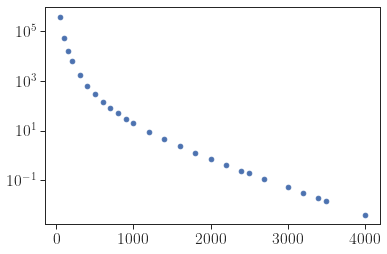

In [4]:
plt.scatter(pts[:,0],pts[:,1])
plt.yscale('log')
plt.show()

In [5]:
from scipy.interpolate import interp1d

In [6]:
f = interp1d(pts[:,0],pts[:,1],kind='linear')

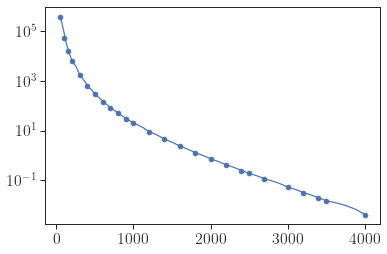

In [7]:
xvals = np.linspace(50,4000.,100)
plt.plot(xvals, f(xvals))
plt.scatter(pts[:,0],pts[:,1])
plt.yscale('log')
plt.show()

In [8]:
import pickle
with open("xsecInterp.pcl", "wb") as handle:
    pickle.dump(f, handle)